# Brain Stroke Prediction Using Machine Learning

## Introduction
This project is based upon the data regarding the potential reasons behind the [Brain Stroke](https://www.healthline.com/health/stroke). I used the various Machine Learning models to predict the responsible factors behind the Brain Stroke and whether the respective case could have one in near future. In the project we have made Three Classification models namely; K-Neighbor Classification, Random Forest Classification and Support Vector Machines.

## Data
The [data](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset) contains following features-
*                Gender  
*                   Age
*          Hypertension
*         Heart Disease
*          Ever Married
*             Work Type
*        Residence Type
*     Avg Glucose Level
*                   BMI
*        Smoking Status
*               Stroke

In [1]:
## Initial libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
df= pd.read_csv('brain_stroke_data.csv')
print('Data shape- ',df.shape)
print('\n')
print('Datatypes-\n',df.dtypes.value_counts())
df[:5]

Data shape-  (4981, 11)


Datatypes-
 object     5
float64    3
int64      3
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data Preprocessing

In [52]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
uniq_vals= df.nunique().sort_values(ascending=False)
uniq_vals

avg_glucose_level    3895
bmi                   342
age                   104
work_type               4
smoking_status          4
gender                  2
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
dtype: int64

## Basic EDA 

In [84]:
## function to facilitate EDA

def get_eda(x):
    f= df[[x,'stroke']].groupby(x).sum('stroke')
    ax= f.plot(kind='bar',figsize=(8,4))
    ax.set(xlabel= x,ylabel='Number of people suffering')
    ax.get_legend().remove()
    plt.xticks(rotation= 45);
    return ax

In [94]:
##  for Continuous variables
def get_eda_line(x):
    f= df[[x,'stroke']].groupby(x).sum('stroke')
    ax= f.plot(figsize=(8,4))
    ax.set(xlabel= x,ylabel='Number of people suffering')
    ax.get_legend().remove()
    plt.xticks(rotation= 45);
    return ax

### Male vs Female suffering from Brain Stroke

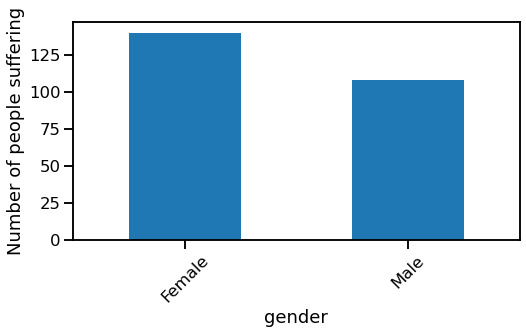

In [85]:
get_eda('gender');

According to data present it indicates that Brain stroke is more common in females compared to males.

### Does heart disease has any impact? 

<AxesSubplot:xlabel='heart_disease', ylabel='Number of people suffering'>

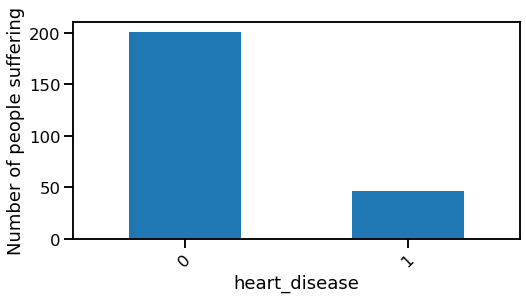

In [86]:
get_eda('heart_disease')

### Hypertension 

<AxesSubplot:xlabel='hypertension', ylabel='Number of people suffering'>

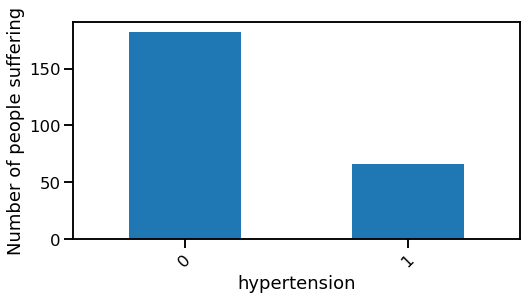

In [87]:
get_eda('hypertension');

### Residence type 

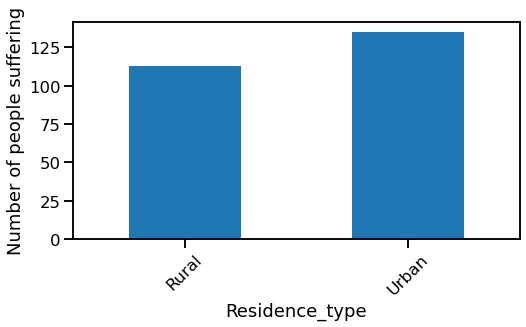

In [89]:
get_eda('Residence_type');

Brain stroke is more common in Urban areas compared to rural ones and it is quite obvious.

###  Work type and Smoking status

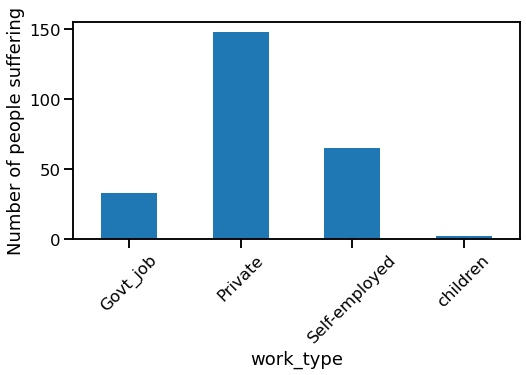

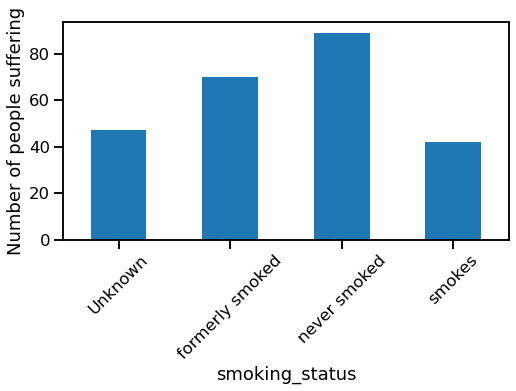

In [90]:
ls= ['work_type', 'smoking_status']
for col in ls:
    get_eda(col)

We see that brain stroke is more commonly found in people working in Private sector compared to others.
In case of smoking status it seems smoking does not impact brain stroke in any way as people who never smoked suffer brain stroke more often than the rest categories.

### What happens when age comes into play? 

<AxesSubplot:xlabel='age', ylabel='Number of people suffering'>

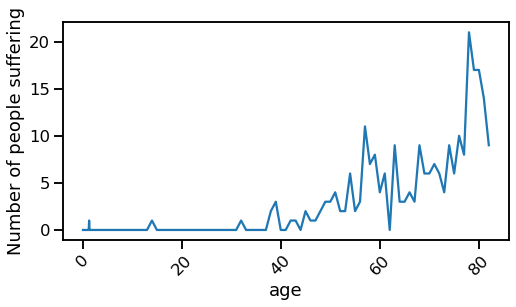

In [93]:
get_eda_line('age');

It is apparent that after 40 it becomes more common in people.

### BMI and Average Glucose level 

(<AxesSubplot:xlabel='bmi', ylabel='Number of people suffering'>,
 <AxesSubplot:xlabel='avg_glucose_level', ylabel='Number of people suffering'>)

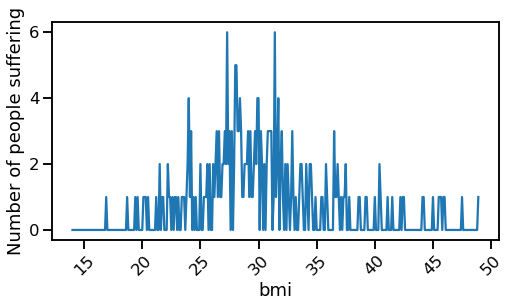

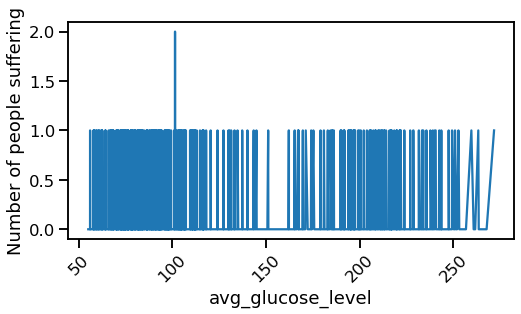

In [95]:
get_eda_line('bmi'), get_eda_line('avg_glucose_level')

In case of BMI, it is apparent that persons with BMI between 24 and 40 are more prone to brain stroke than the rest.
On the other hand Average Glucose Level graph looks quite constant meaning glucose level does not really  cause brain stroke  but aroud 100 glucose level there is a significant increase in number of brain strokefor a exception of 100 as Average Glucose level.

In [59]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [57]:
df[['smoking_status','stroke']].groupby('smoking_status').count()

,stroke
smoking_status,
Unknown,1500
formerly smoked,867
never smoked,1838
smokes,776


In [6]:
binary_cols= uniq_vals[uniq_vals==2].index.ravel()
binary_cols

array(['gender', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'stroke'], dtype=object)

In [7]:
cat_cols= uniq_vals[(uniq_vals >2)&(uniq_vals <6)].index
[[i, list(df[i].unique())] for i in cat_cols]

[['work_type', ['Private', 'Self-employed', 'Govt_job', 'children']],
 ['smoking_status', ['formerly smoked', 'never smoked', 'smokes', 'Unknown']]]

In [8]:
num_cols= list(set(df.columns)- set(cat_cols)- set(binary_cols))
num_cols

['avg_glucose_level', 'age', 'bmi']

## Feature Engineering

Here we used One Hot Encoding to convert string columns into integers as ML Models cannot be fed with datatypes other than numeric.

In [9]:
from sklearn.preprocessing import LabelBinarizer
lb= LabelBinarizer()

for col in binary_cols:
    df[col]= lb.fit_transform(df[col])

In [10]:
df_processed= pd.get_dummies(df, columns= cat_cols, drop_first=True)
df_processed.sample(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2545,0,47.0,0,0,0,0,143.45,23.8,0,1,0,0,0,1,0
4771,1,82.0,1,0,1,0,71.97,28.3,0,0,1,0,0,1,0
3591,0,19.0,0,0,0,0,56.85,21.1,0,1,0,0,0,1,0
4685,0,72.0,0,0,1,1,74.17,35.5,0,0,1,0,1,0,0
4770,1,9.0,0,0,0,1,71.88,17.5,0,0,0,1,0,0,0


In [11]:
df_processed.to_csv('brain_stroke_pro.csv',index=False)

In [12]:
feat_cols= [x for x in df_processed.columns if x not in 'stroke']
target_col= 'stroke'

### Correlation

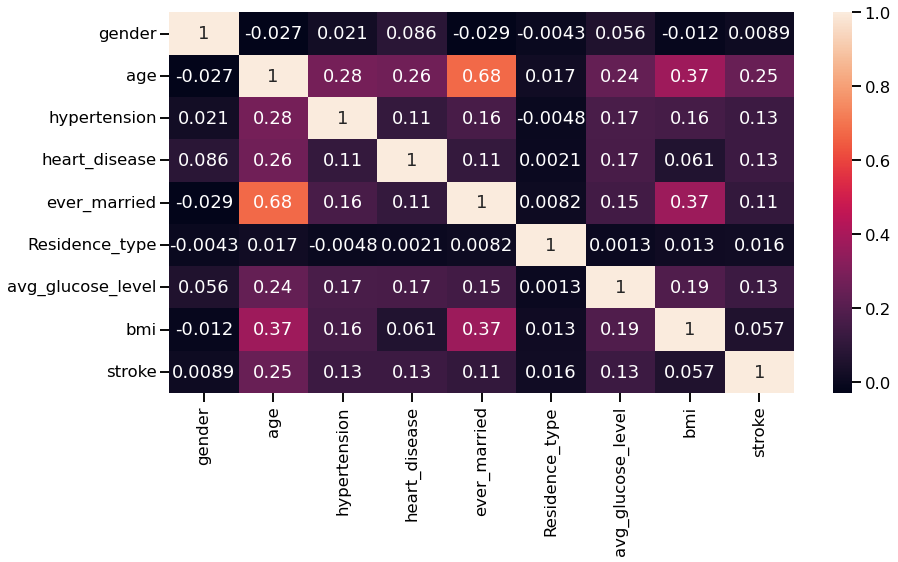

In [13]:
sns.set_context('talk')
f, ax= plt.subplots(figsize=(14,7))
sns.heatmap(df.corr(),annot=True);

Correlation of Independent features with Dependent one.

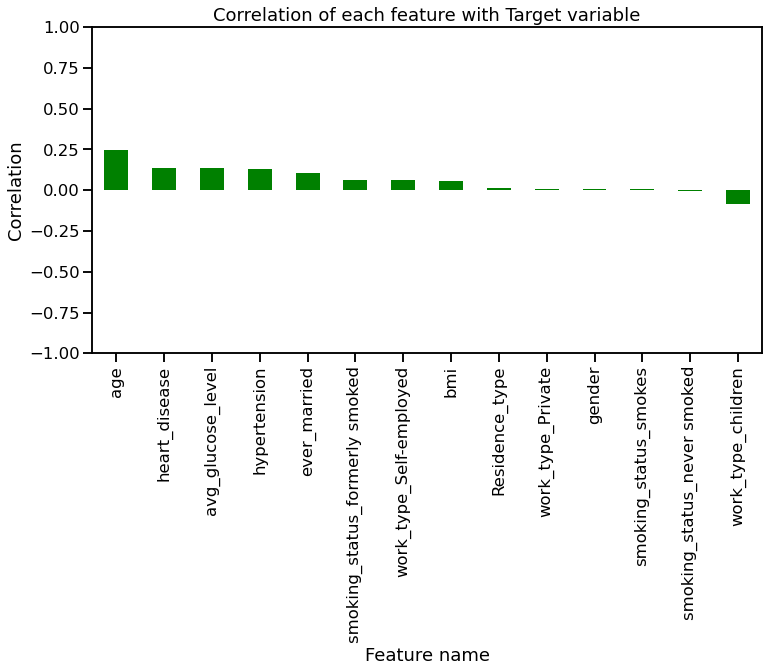

In [14]:
corr_df= df_processed[feat_cols].corrwith(df_processed[target_col]).sort_values(ascending=False)

sns.set_context('talk')
ax= corr_df.plot(kind='bar', figsize= (12,6), color='g')
ax.set(xlabel='Feature name', 
       ylabel='Correlation',
       title='Correlation of each feature with Target variable', 
       ylim=[-1,1]);

What we notice in the above chart is that feature columns are not correlated enough with the Target column.

In [15]:
df_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4981.0,0.416382,0.493008,0.00,0.00,0.00,1.00,1.00
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
ever_married,4981.0,0.658502,0.474260,0.00,0.00,1.00,1.00,1.00
Residence_type,4981.0,0.508332,0.499981,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00
work_type_Private,4981.0,0.574182,0.494516,0.00,0.00,1.00,1.00,1.00


### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

df_processed[num_cols]= sc.fit_transform(df_processed[num_cols])

## Data Split between Training set and Hold out set

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:

x= df_processed.drop('stroke',axis=1)
y= df_processed['stroke']
ss= StratifiedShuffleSplit(n_splits=1, test_size= 0.3, random_state= 42)

train_indx, test_indx= next(ss.split(x,y))
x_train, x_test= x.loc[train_indx], x.loc[test_indx]
y_train, y_test= y.loc[train_indx], y.loc[test_indx]

print('Percent of Stroke vs No Stroke in original data- \n', y.value_counts(normalize=True))
print('\n')
print('Percent of Stroke vs No Stroke in Training set- \n', y_train.value_counts(normalize=True))
print('\n')
print('Percent of Stroke vs No Stroke in Hold out set- \n', y_test.value_counts(normalize=True))

Percent of Stroke vs No Stroke in original data- 
 0    0.950211
1    0.049789
Name: stroke, dtype: float64


Percent of Stroke vs No Stroke in Training set- 
 0    0.950086
1    0.049914
Name: stroke, dtype: float64


Percent of Stroke vs No Stroke in Hold out set- 
 0    0.950502
1    0.049498
Name: stroke, dtype: float64


## Model Development Phase

### Model 1. K-Neighbor Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, classification_report

Here we will first find the appropriate hyperparameters to be fed in the algorithm.

In [20]:
n= list(range(1,31))
error_list= []
f1_score_list= []

for i in n:
    knn= KNeighborsClassifier(n_neighbors= i).fit(x_train, y_train)
    y_pred= knn.predict(x_test)
    error_list.append(pd.Series({'n_neighbors':i,
                                'error_rate':1- round(accuracy_score(y_test, y_pred),3)}))
    
    f1_score_list.append(pd.Series({'n_neighbors':i,
                                    'f1_score':round(f1_score(y_test, y_pred),3)}))
    
error_list= pd.concat(error_list,axis=1).T
f1_score_list= pd.concat(f1_score_list,axis=1).T

In [21]:
error_list= error_list.set_index('n_neighbors')
f1_score_list= f1_score_list.set_index('n_neighbors')

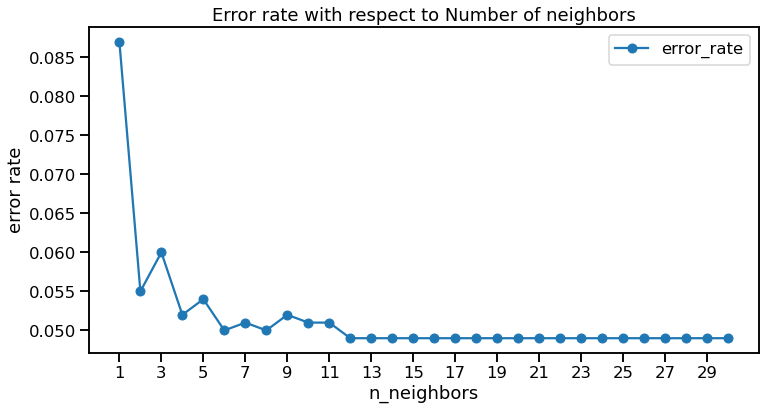

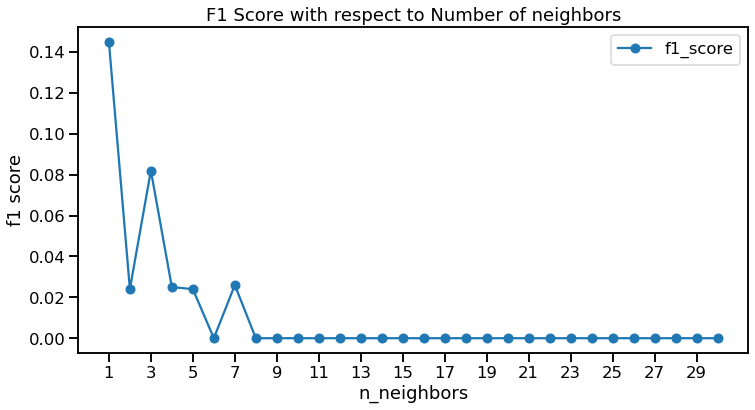

In [22]:
ax1= error_list.plot(marker= 'o', figsize=(12,6))
ax2= f1_score_list.plot(marker='o', figsize=(12,6))

ax1.set(ylabel='error rate', title= 'Error rate with respect to Number of neighbors')
ax1.set_xticks(range(1,31,2))

ax2.set(ylabel='f1 score',title= 'F1 Score with respect to Number of neighbors')
ax2.set_xticks(range(1,31,2));

###  KNN Model with best parameters we identified above

In [23]:
knn_est= KNeighborsClassifier(n_neighbors= 6).fit(x_train, y_train)
y_pred1= knn_est.predict(x_test)

In the below code chunk, I have defined two functions get_evaluation() and get_matrix(). Both are to evaluate results in the form of different metrics such as accuracy, precision, recall, f1 score and confusion matrix.

In [24]:
def get_evaluation(y_true, y_pred,label):
    return pd.Series({'Accuracy':accuracy_score(y_true, y_pred),
                     'Recall':recall_score(y_true, y_pred),
                     'F1 Score':f1_score(y_true, y_pred),
                     'Precision':precision_score(y_true, y_pred)},name=label)

def get_matrix(y_true, y_pred):
    plt.figure(figsize=(10,5))
    ax= sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')
    ax.set_xlabel('Predicted values',fontsize= 25)
    ax.set_ylabel('Actual values',fontsize= 25)
    label= ['Absent','Present']
    ax.set_xticklabels(label, fontsize= 20)
    ax.set_yticklabels(label,fontsize= 20)
    return ax
    

### Model Evaluation

In [25]:
print(get_evaluation(y_test, y_pred1,'test'))
print('\n')
print('Classification Report- ','\n',classification_report(y_test, y_pred1))

Accuracy     0.949833
Recall       0.000000
F1 Score     0.000000
Precision    0.000000
Name: test, dtype: float64


Classification Report-  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



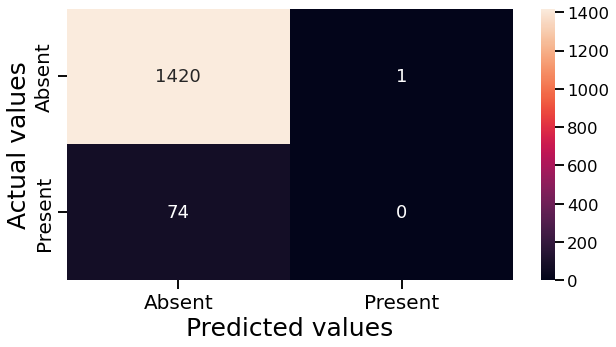

In [26]:
get_matrix(y_test, y_pred1);

Using KNN Model our Accuracy is quite high but other measures such as Precison for True Negatives is not accurate, hence we will try to optimize model using other models and different optimization techniques.

### Model 2. Random Forest Classification Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
oobg_error=[]
ns= [15,20,40,50,80,100,150,200,300,400]

for n in ns:
    rf= RandomForestClassifier(n_estimators=n,
                              oob_score=True,
                              warm_start=True,
                              n_jobs=-1,
                              random_state=42).fit(x_train, y_train)
    
    oobg_error.append(pd.Series({'n_estimator':n,
                                'oobg_error':1- round(rf.oob_score_,3)}))
    
oobg_error_df= pd.concat(oobg_error,axis=1).T    

   n_estimator  oobg_error
0         15.0       0.057
1         20.0       0.057
2         40.0       0.052
3         50.0       0.052
4         80.0       0.052
5        100.0       0.052
6        150.0       0.051
7        200.0       0.051
8        300.0       0.052
9        400.0       0.051


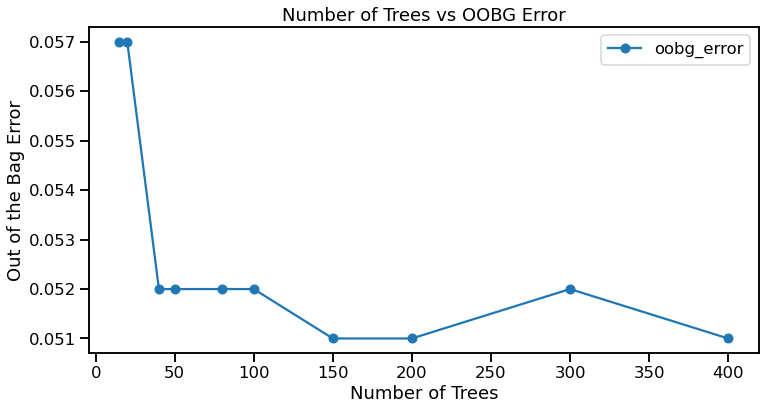

In [29]:
print(oobg_error_df)
ax= oobg_error_df.set_index('n_estimator').plot(marker='o',figsize=(12,6))
ax.set(xlabel='Number of Trees',
      ylabel='Out of the Bag Error',
      title='Number of Trees vs OOBG Error');

### Random Forest with appropriate hyper-parameters identifed above

In [30]:
## best estimator
rf_est= RandomForestClassifier(n_estimators=40,
                              warm_start=True,
                              n_jobs=-1,
                              random_state=42,
                              oob_score=True).fit(x_train, y_train)

y_pred2= rf_est.predict(x_test)

### Model Evaluation

Accuracy     0.949833
Recall       0.000000
F1 Score     0.000000
Precision    0.000000
Name: test, dtype: float64


Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



<AxesSubplot:xlabel='Predicted values', ylabel='Actual values'>

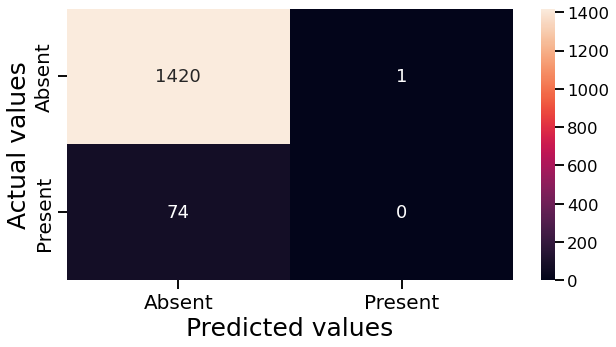

In [31]:
print(get_evaluation(y_test,y_pred2,'test'))
print('\n')
print('Classification Report','\n',classification_report(y_test,y_pred2))
get_matrix(y_test,y_pred2)

Again with Random forest too we did not see any such improvement. The results are almost same. But with the Random Forest classifier we can see the feature importance this model come up with to have an estimate about crucial and non-crucial features.

### Features Importance identified by Random Forest

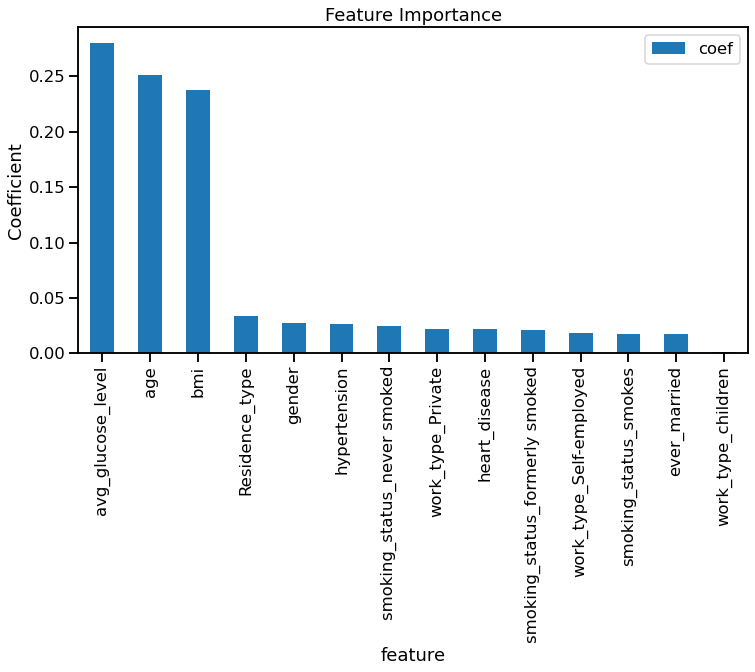

In [32]:
feat_imp= pd.DataFrame(rf_est.feature_importances_,index=x.columns,columns=['coef']).sort_values(by='coef',ascending=False)
#print(feat_imp)
ax= feat_imp.plot(kind= 'bar',figsize=(12,6))
ax.set(xlabel='feature',
      ylabel='Coefficient',
      title='Feature Importance');

It is quite clear tha Random Forest rates 'Average Glucose Level', 'Age' and 'BMI' higher than the rest. This clarifies that what are out material dimensions and what are immaterial with respect to Random Forest Classifier.

## Model Optimization using Principal Component Analysis[PCA]
Using Principal Component Analysis we will reduce the dimension of the data to minimize the variance.

In [33]:
from sklearn.decomposition import PCA

In [34]:
exp_variance= []

for i in range(1,15):
    pca= PCA(n_components= i).fit(x)
    exp_variance.append(pd.Series({'n_feat':i,
                                  'var_exp':pca.explained_variance_ratio_.sum()}))
    
variance= pd.concat(exp_variance,axis=1).T

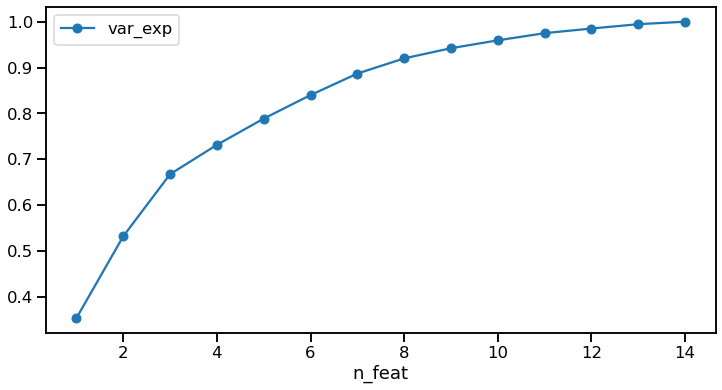

In [35]:
ax= variance.set_index('n_feat').plot(marker='o',figsize=(12,6))
ax.set_xticklabels(range(0,16,2));

Here we see that after 9 features approaximately our graph is going up but at dimnishing rate. And explains variance quite well that is after this point we are not losing much information. Hence we can continue with 9 dimensions and can try to test whether out model optimizes or not.

### PCA with Best Estimators

In [36]:
best_pca= PCA(n_components=9).fit(x)
x_pca= best_pca.fit_transform(x)
print(x_pca.shape)
x_pca= pd.DataFrame(x_pca)
x_pca.head()

(4981, 9)


,0,1,2,3,4,5,6,7,8
0,2.624913,1.845577,0.393618,0.318585,-0.859274,-0.308333,0.273345,-0.645430,0.038213
1,1.531020,-0.571893,-0.591389,-0.520978,-0.068159,0.640647,0.756519,0.031554,0.324809
2,1.350034,0.882176,0.641794,-0.111184,-0.492603,-0.646754,-0.582276,0.684573,-0.161195
3,1.425906,1.195394,-1.589737,-0.107519,1.117065,0.406161,-0.144253,0.165179,0.189745
4,1.961750,1.194613,-0.850797,0.157198,-0.960417,-0.317807,0.295073,-0.641053,0.071282


## Data Split between and Training and Test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train_p, x_test_p, y_train_p, y_test_p= train_test_split(x_pca,y,test_size=0.3,random_state= 42)

### Model-3 KNN Model with PCA Transformation

In [39]:
error= []
f1_score_=[]
for n in range(1,21):
    knn= KNeighborsClassifier(n_neighbors=n).fit(x_train_p, y_train_p)
    y_pred3= knn.predict(x_test_p)
    error.append(pd.Series({'n':n,
                    'error':1- round(accuracy_score(y_test_p,y_pred3),3)}))
    
    f1_score_.append(pd.Series({'n':n,
                    'f1_score':1- round(f1_score(y_test_p,y_pred3),3)}))
    
error_df= pd.concat(error, axis=1).T 
f1_score_= pd.concat(f1_score_,axis=1).T

In [40]:
f1_score_= f1_score_.set_index('n')
error_df= error_df.set_index('n')

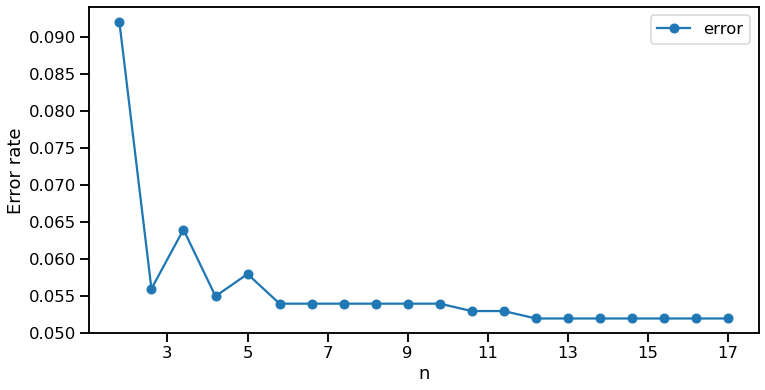

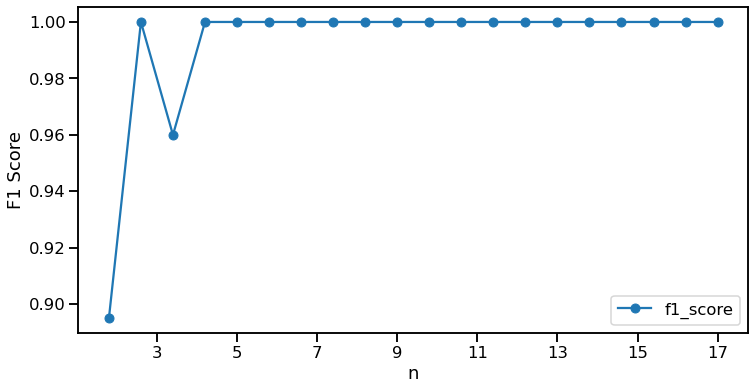

In [41]:
ax= error_df.plot(marker='o',figsize=(12,6))
ax1= f1_score_.plot(marker='o',figsize=(12,6))
ax.set(ylabel='Error rate',xticklabels=(range(1,21,2)))
ax1.set(ylabel= 'F1 Score',xticklabels=(range(1,21,2)));

### KNN Model and Result Evaluation

Accuracy     0.945151
Recall       0.000000
F1 Score     0.000000
Precision    0.000000
Name: test, dtype: float64


<AxesSubplot:xlabel='Predicted values', ylabel='Actual values'>

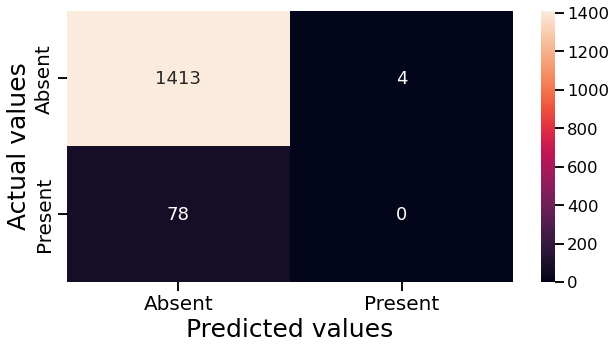

In [42]:
## best estimators
best_knn= KNeighborsClassifier(n_neighbors=4).fit(x_train_p,y_train_p)
y_pred4= best_knn.predict(x_test_p)
print(get_evaluation(y_test_p,y_pred4,'test'))
get_matrix(y_test_p,y_pred4)

Even after dimensionality reduction and applying it into out data our model is not performing well for Precision and Recall though our accuracy is still high as before.

### Model-4 Support Vector Machine  with PCA

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [44]:
%%time
params= {'C':[0.001,0.01,1,5,10,20,50,80,100],
       'gamma':[0.0001,0.001,0.1,1,10,20,50,80,100]}

gcv= GridSearchCV(estimator= SVC(kernel='rbf'),
                 param_grid= params,
                 n_jobs=-1,
                 scoring='accuracy',
                 cv=4).fit(x_train_p, y_train_p)

print('Best Estimator- ', gcv.best_estimator_)
y_pred5= gcv.predict(x_test_p)

Best Estimator-  SVC(C=0.001, gamma=0.0001)
CPU times: total: 1.11 s
Wall time: 2min 58s


Accuracy     0.947826
Recall       0.000000
F1 Score     0.000000
Precision    0.000000
Name: test, dtype: float64


<AxesSubplot:xlabel='Predicted values', ylabel='Actual values'>

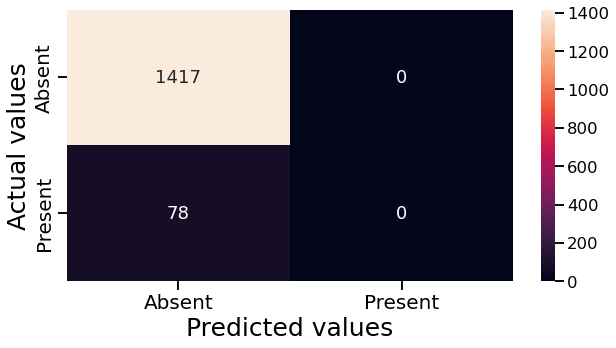

In [45]:
print(get_evaluation(y_test_p,y_pred5,'test'))
get_matrix(y_test_p, y_pred5)

We still did not get the desired output

## Stacking
At last we can use stacking to combine two different models and test it as it is very effective optimization method.

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
estimator2= [('rf',rf_est),('knn',best_knn)]

vc= VotingClassifier(estimators=estimator2,voting='soft').fit(x_train,y_train)
y_pred6= vc.predict(x_test)

Accuracy     0.949164
Recall       0.013514
F1 Score     0.025641
Precision    0.250000
Name: test, dtype: float64


<AxesSubplot:xlabel='Predicted values', ylabel='Actual values'>

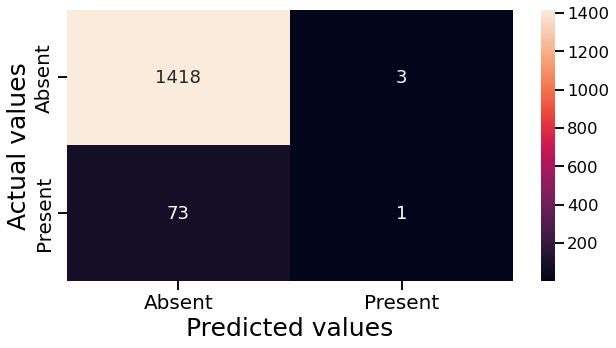

In [48]:
print(get_evaluation(y_test,y_pred6,'test'))
get_matrix(y_test,y_pred6)

After applying Stacking we see a extremely minor improvement but far from the desired output.
And the possible reason behind Models not optimizing upto the desired level could be a very low correlation among the feature columns. We saw that the maximum correlaton value was around 0.25. Although the accuracy shown by all the models is very high.
Since this is the case of predicting brain stroke in the patients, here we cannot afford a low precision. Hence, cannot rely upon the accuracy being very high and precision being not upto the level.
In such cases, we can optimize the models only after feeding them with more data and it should be moderately correlated atleast. So that we can identify the robust and highly accurate features and there results.